In [58]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import metrics

In [59]:
def polynomial(x):
  return 5 * x**3 - 10 * x**2 - 20 * x + 10

simple DNN

In [60]:
input = Input((1,))
x = Dense(32, activation='relu', name='dense_1')(input)
x = Dense(64, activation='relu', name='dense_2')(x)
x = Dense(128, activation='relu', name='dense_3')(x)
output = Dense(1, activation='tanh', name='output')(x)

model = Model(input, output)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Prepare Datapoints

In [61]:
n = 1000
x = np.linspace(-20,20,n)
np.random.seed(42)
np.random.shuffle(x)
y = polynomial(x)

Normalize the data to range [-1,1] (min-max normalization technique is used)

In [62]:
norm_x = ((x-np.min(x)) / (np.max(x) - np.min(x)))*2 - 1
norm_y = ((y-np.min(y)) / (np.max(y) - np.min(y)))*2 - 1

Split & Prepare dataset

In [63]:
test_len = int (0.05 * len(norm_x))
val_len = int (0.05 * len(norm_x))
train_len = len(norm_x) - test_len - val_len

trainX, trainY = norm_x[:train_len], norm_y[:train_len]
testX, testY = norm_x[train_len:train_len+test_len], norm_y[train_len:train_len+test_len]
valX, valY = norm_x[train_len+test_len:train_len+test_len+val_len], norm_y[train_len+test_len:train_len+test_len+val_len]

In [64]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[metrics.R2Score(name='accuracy')])
history = model.fit(trainX, trainY,batch_size=32, epochs=10, validation_data=(valX, valY))

Epoch 1/10


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3434 - loss: 0.0906 - val_accuracy: 0.7422 - val_loss: 0.0284
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.0296 - val_accuracy: 0.8935 - val_loss: 0.0117
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.0144 - val_accuracy: 0.9444 - val_loss: 0.0061
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.0091 - val_accuracy: 0.9674 - val_loss: 0.0036
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9606 - loss: 0.0056 - val_accuracy: 0.9732 - val_loss: 0.0030
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.0047 - val_accuracy: 0.9775 - val_loss: 0.0025
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0036 - val_accuracy: 0.9829 - val_loss: 0.0019
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0028 - val_accuracy: 0.9894 - val_loss: 0.0012
Epo

In [65]:
eval = model.evaluate(testX, testY)
# Predict on test data
predictions = model.predict(testX)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9861 - loss: 0.0021
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


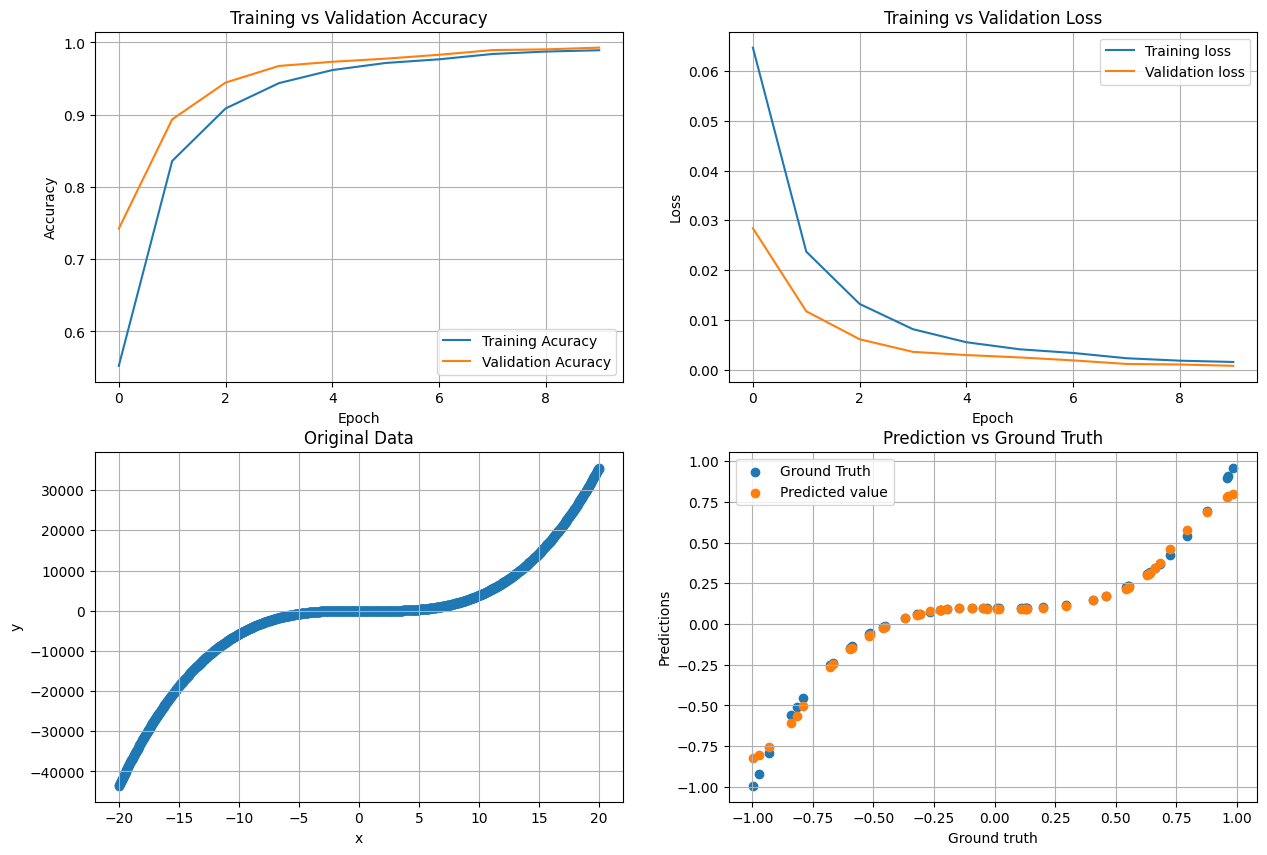

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label = 'Training Acuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Acuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Training vs Validation Loss')


# Plot prediction accuracy vs ground truth(normalized)
plt.subplot(2,2,4)
plt.scatter(testX, testY)
plt.scatter(testX, predictions)
plt.ylabel('Predictions')
plt.xlabel('Ground truth')
plt.title('Prediction vs Ground Truth')
plt.legend(['Ground Truth', 'Predicted value'])
plt.grid()

# original datapoint
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data')
plt.grid()
plt.show()